In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CorianderFutures.csv to CorianderFutures.csv


In [ ]:
df = pd.read_csv("CorianderFutures.csv")
df.tail(6)

,Date,PriceRs,ExchangeRate,PriceUSD
244,9/6/2020,"6,726.00",73.430,91.597440
245,9/13/2020,"6,696.00",73.538,91.054965
246,9/20/2020,"6,584.00",73.670,89.371522
247,9/27/2020,"6,780.00",73.290,92.509210
248,10/4/2020,"6,708.00",73.010,91.877825
249,10/11/2020,"6,610.00",73.255,90.232749


In [ ]:
df.shape

(250, 4)

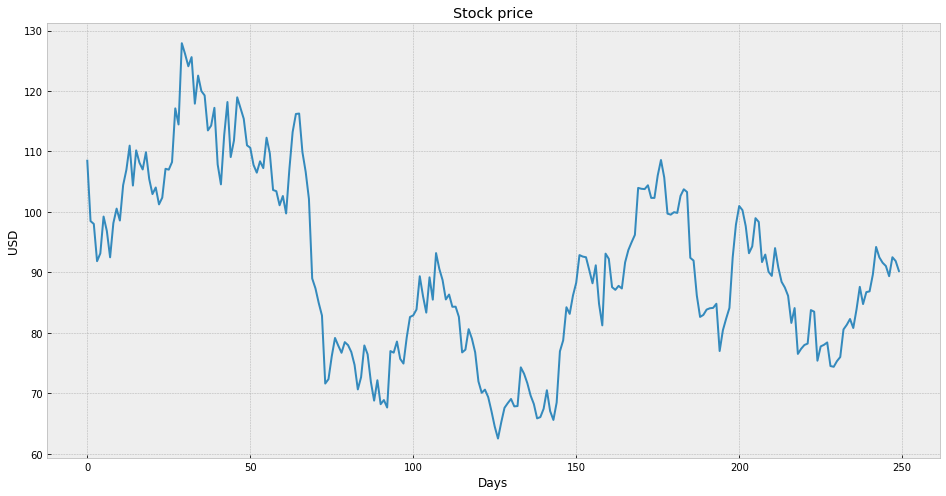

In [ ]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Stock price')
plt.plot(df['PriceUSD'])
plt.show()

In [ ]:
df = df[['PriceUSD']]
df.head(4)

,PriceUSD
0,108.471584
1,98.487643
2,98.017735
3,91.855977


In [ ]:
future_days = 50
df['Prediction'] = df['PriceUSD'].shift(-future_days)
df.tail(4)

,PriceUSD,Prediction
246,89.371522,NaN
247,92.509210,NaN
248,91.877825,NaN
249,90.232749,NaN


In [ ]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[108.4715844 ]
 [ 98.48764294]
 [ 98.01773527]
 [ 91.8559769 ]
 [ 93.14260434]
 [ 99.23955489]
 [ 96.85607995]
 [ 92.49749043]
 [ 98.15052735]
 [100.5513964 ]
 [ 98.5779706 ]
 [104.4307112 ]
 [106.9841031 ]
 [110.9675287 ]
 [104.3654365 ]
 [110.1860186 ]
 [108.1520512 ]
 [107.027027  ]
 [109.8795902 ]
 [105.4474246 ]
 [102.9523653 ]
 [104.0447761 ]
 [101.251643  ]
 [102.3645526 ]
 [107.13707   ]
 [106.9950886 ]
 [108.2530273 ]
 [117.1266439 ]
 [114.4682372 ]
 [127.9123847 ]
 [126.1332695 ]
 [124.0957733 ]
 [125.6088297 ]
 [117.9099142 ]
 [122.5540834 ]
 [119.9940205 ]
 [119.2694745 ]
 [113.4813438 ]
 [114.2797043 ]
 [117.2187021 ]
 [107.8585668 ]
 [104.563249  ]
 [112.686813  ]
 [118.1807294 ]
 [109.080145  ]
 [111.8182751 ]
 [118.9597046 ]
 [117.1671738 ]
 [115.4142582 ]
 [111.0161374 ]
 [110.6180993 ]
 [107.7772055 ]
 [106.4963664 ]
 [108.37489   ]
 [107.2493573 ]
 [112.282505  ]
 [109.6838533 ]
 [103.6288031 ]
 [103.4287418 ]
 [101.1028584 ]
 [102.6355196 ]
 [ 99.75208474]
 [107.06

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[110.6180993  107.7772055  106.4963664  108.37489    107.2493573
 112.282505   109.6838533  103.6288031  103.4287418  101.1028584
 102.6355196   99.75208474 107.0637648  113.2136034  116.204132
 116.2750895  109.9100496  106.6357309  102.1465236   88.9994558
  87.35582087  84.95314799  82.85537126  71.61375456  72.34804265
  76.11882417  79.15665452  77.88610337  76.7040619   78.46454737
  77.96847092  76.83069485  74.69179427  70.64234487  72.67337546
  77.91578783  76.45450996  71.89778161  68.78802059  72.1660622
  68.19782575  68.88379205  67.65069552  76.98339483  76.72201722
  78.56257745  75.70179475  74.92117204  79.23623995  82.62554247
  82.8939206   83.8639201   89.36269916  86.05889724  83.34385854
  89.18409055  85.49271502  93.19075326  90.58163106  88.73009709
  85.52518882  86.33905115  84.31462741  84.33013436  82.64348361
  76.76565625  77.21723105  80.60988757  79.04375144  76.77088053
  71.97538277  70.08380724  70.60570071  69.36314164  67.04562232
  64.49735055  6

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [ ]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 88.30231406],
       [ 92.86432161],
       [ 92.61924922],
       [ 92.50556174],
       [ 90.39064728],
       [ 88.19870447],
       [ 91.17181884],
       [ 84.80234094],
       [ 81.23859009],
       [ 93.10296192],
       [ 92.23769861],
       [ 87.55883386],
       [ 87.11622038],
       [ 87.77363272],
       [ 87.33802817],
       [ 91.65571616],
       [ 93.70242014],
       [ 94.99783143],
       [ 96.20582496],
       [103.975712  ],
       [103.8300332 ],
       [103.7791577 ],
       [104.4094488 ],
       [102.3228888 ],
       [102.3209312 ],
       [106.018782  ],
       [108.5903719 ],
       [105.7056625 ],
       [ 99.71883786],
       [ 99.55178784],
       [ 99.9640882 ],
       [ 99.8404641 ],
       [102.6588751 ],
       [103.7485414 ],
       [103.2965437 ],
       [ 92.40708479],
       [ 91.95121951],
       [ 86.16265298],
       [ 82.63649779],
       [ 82.96393663],
       [ 83.8453249 ],
       [ 84.06727615],
       [ 84.1304501 ],
       [ 84

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[100.9809417  100.2930914   80.8032449   80.8032449   94.30018377
  98.97172237  81.23859009  91.70806801  92.94970043  90.10710259
  89.42162945  71.97538277  90.81126406  88.44298399  87.50419416
 108.37489     81.63884255  76.51679307  76.51679307  77.36279477
  77.98918804  78.22562663  83.76494155  75.39006162  75.39006162
  89.36269916  78.0168134   88.9994558   74.50954575  74.38661464
  75.33086289  76.00262985  85.52518882  81.32769109  82.29272737
  80.8032449   83.90189193  87.61369716  84.76159966  86.73278942
  86.86593477  89.6422851   94.20904341  92.48318302  91.59743974
  94.99783143  89.37152165  92.50920999  80.8032449   90.23274862]

[86.34864959 85.99073996 86.00996697 86.01888625 86.18481063 86.35677822
 86.12352427 86.62323793 86.90282991 85.97201757 86.0399013  86.40697889
 86.44170387 86.39012697 86.42430207 86.08556039 85.92498743 85.8233567
 85.72858427 85.11900234 85.13043148 85.13442289 85.08497377 85.24867361
 85.24882719 84.95871448 84.7569619  84.9832800

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


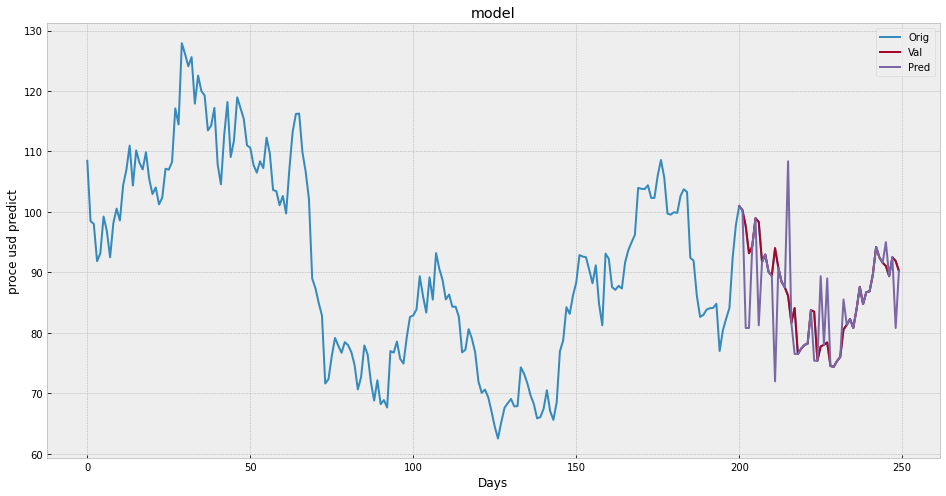

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel('Days')
plt.ylabel('proce usd predict')
plt.plot(df['PriceUSD'])
plt.plot(valid[['PriceUSD','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


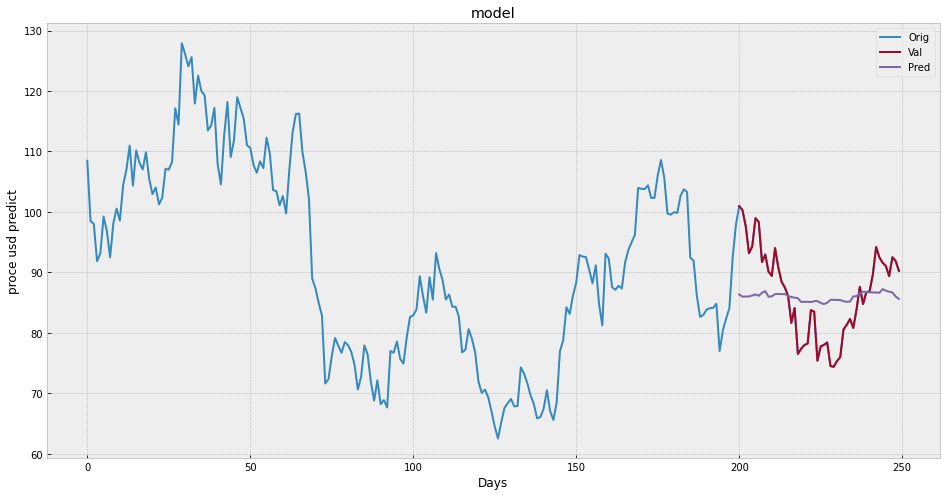

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("model")
plt.xlabel('Days')
plt.ylabel('proce usd predict')
plt.plot(df['PriceUSD'])
plt.plot(valid[['PriceUSD','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()